<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Coffee Shop Transactions Analysis</b></div><div>
Coffee shops are not just about coffee; they are about the experience, the ambiance, and the delightful array of snacks that accompany your favorite brew. In this notebook, we will dive into a dataset of coffee shop transactions to uncover patterns and insights that could help a coffee shop owner optimize their menu and understand customer preferences.


## Table of Contents
- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Discussion and Conclusion](#Discussion-and-Conclusion)

## Introduction
In this notebook, we will explore a dataset of coffee shop transactions. The dataset includes various types of lattes, other coffee drinks, and an assortment of snacks. Our goal is to analyze the data to understand customer preferences and potentially build a predictive model to forecast future sales trends.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure inline plotting
%matplotlib inline

## Data Loading
Let's load the dataset and take a quick look at the first few rows to understand its structure.

In [2]:
# Load the dataset
file_path = '/kaggle/input/coffee-shop-dataset/coffee_shop_transactions.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,TransactionID,Latte,Hazelnut Latte,Vanilla Latte,Creamy Aren Latte,Caramel Latte,Matcha Latte,Cappuccino,Caramel Macchiato,Americano,Matcha Bun,Cheese Toast,Chocolate Toast,Butter Toast,Cookies,Croissant,Egg Salad Toast,Fries,Crispy Chicken Nuggets
0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,3,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
3,4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,5,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0


## Data Cleaning and Preprocessing
Before diving into analysis, it's crucial to clean and preprocess the data. This includes checking for missing values, ensuring data types are correct, and handling any anomalies.

In [3]:
# Check for missing values
df.isnull().sum()

TransactionID             0
Latte                     0
Hazelnut Latte            0
Vanilla Latte             0
Creamy Aren Latte         0
Caramel Latte             0
Matcha Latte              0
Cappuccino                0
Caramel Macchiato         0
Americano                 0
Matcha Bun                0
Cheese Toast              0
Chocolate Toast           0
Butter Toast              0
Cookies                   0
Croissant                 0
Egg Salad Toast           0
Fries                     0
Crispy Chicken Nuggets    0
dtype: int64

In [4]:
# Check data types
df.dtypes

TransactionID             int64
Latte                     int64
Hazelnut Latte            int64
Vanilla Latte             int64
Creamy Aren Latte         int64
Caramel Latte             int64
Matcha Latte              int64
Cappuccino                int64
Caramel Macchiato         int64
Americano                 int64
Matcha Bun                int64
Cheese Toast              int64
Chocolate Toast           int64
Butter Toast              int64
Cookies                   int64
Croissant                 int64
Egg Salad Toast           int64
Fries                     int64
Crispy Chicken Nuggets    int64
dtype: object

The dataset appears to be clean with no missing values and all columns are of integer type, which is expected given the nature of transaction data.

## Exploratory Data Analysis
Let's explore the data to understand the distribution of different products and identify any interesting patterns.

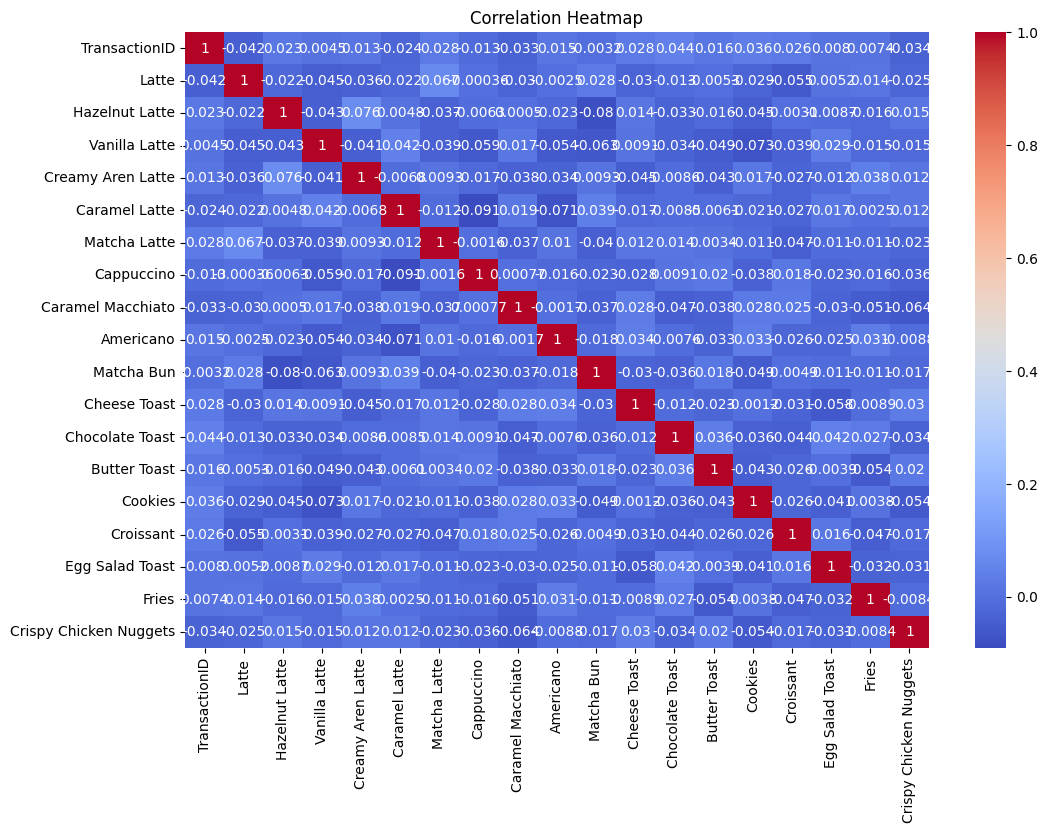

In [5]:
# Plot a heatmap of the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Plot a pair plot to visualize relationships
sns.pairplot(numeric_df)
plt.show()

In [ ]:
# Plot histograms for each product
numeric_df.hist(figsize=(14, 10), bins=20)
plt.suptitle('Product Distribution Histograms')
plt.show()

## Predictive Modeling
Let's attempt to build a predictive model to forecast the likelihood of a transaction including a specific product. For simplicity, we'll predict whether a transaction includes a 'Latte'.

In [ ]:
# Define features and target variable
X = df.drop(columns=['Latte', 'TransactionID'])
y = df['Latte'] > 0  # Binary target: whether a Latte was purchased

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

## Discussion and Conclusion
In this notebook, we explored a dataset of coffee shop transactions, performed data cleaning, and conducted exploratory data analysis to understand customer preferences. We also built a predictive model to forecast the likelihood of a transaction including a Latte.

The Random Forest model provided a reasonable accuracy, indicating that certain patterns in the data can help predict product purchases. Future analysis could involve more sophisticated models or feature engineering to improve prediction accuracy.

If you found this notebook useful, please consider upvoting it. Your feedback is appreciated.